# U.S. Medical Insurance Costs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/Users/dan/Desktop/programming/python_stuff/python-portfolio-project-starter-files/insurance.csv")
data_dict = df.to_dict()

#data lists broken down by column
ages = list(data_dict["age"].values())
sexes = list(data_dict["sex"].values())
bmis = list(data_dict["bmi"].values())
smokers = list(data_dict["smoker"].values())
regions = list(data_dict["region"].values())
insurance_charges = list(data_dict["charges"].values())
print(ages)

[19, 18, 28, 33, 32, 31, 46, 37, 37, 60, 25, 62, 23, 56, 27, 19, 52, 23, 56, 30, 60, 30, 18, 34, 37, 59, 63, 55, 23, 31, 22, 18, 19, 63, 28, 19, 62, 26, 35, 60, 24, 31, 41, 37, 38, 55, 18, 28, 60, 36, 18, 21, 48, 36, 40, 58, 58, 18, 53, 34, 43, 25, 64, 28, 20, 19, 61, 40, 40, 28, 27, 31, 53, 58, 44, 57, 29, 21, 22, 41, 31, 45, 22, 48, 37, 45, 57, 56, 46, 55, 21, 53, 59, 35, 64, 28, 54, 55, 56, 38, 41, 30, 18, 61, 34, 20, 19, 26, 29, 63, 54, 55, 37, 21, 52, 60, 58, 29, 49, 37, 44, 18, 20, 44, 47, 26, 19, 52, 32, 38, 59, 61, 53, 19, 20, 22, 19, 22, 54, 22, 34, 26, 34, 29, 30, 29, 46, 51, 53, 19, 35, 48, 32, 42, 40, 44, 48, 18, 30, 50, 42, 18, 54, 32, 37, 47, 20, 32, 19, 27, 63, 49, 18, 35, 24, 63, 38, 54, 46, 41, 58, 18, 22, 44, 44, 36, 26, 30, 41, 29, 61, 36, 25, 56, 18, 19, 39, 45, 51, 64, 19, 48, 60, 27, 46, 28, 59, 35, 63, 40, 20, 40, 24, 34, 45, 41, 53, 27, 26, 24, 34, 53, 32, 19, 42, 55, 28, 58, 41, 47, 42, 59, 19, 59, 39, 40, 18, 31, 19, 44, 23, 33, 55, 40, 63, 54, 60, 24, 19, 29,

In [2]:
#what is average age of insurance holder?
avg_age = round(sum(ages)/len(ages), 1) 
print("The average age of an insurance holder is " + str(avg_age) + " years old.")

#what is the average cost of insurance?
avg_cost = round(sum(insurance_charges)/len(insurance_charges), 2)
print("The average insurance cost is " + str(avg_cost) + " dollars.")

#what is the average bmi?
avg_bmi = round(sum(bmis)/len(bmis), 2)
print("Insurance holders have an average bmi of " + str(avg_bmi) + ".")

The average age of an insurance holder is 39.2 years old.
The average insurance cost is 13270.42 dollars.
Insurance holders have an average bmi of 30.66.


In [3]:
#in which region are the highest percentage of smokers?
i = 0
region_of_smoker = []
while i < len(smokers):
    if smokers[i] == "yes":
        region_of_smoker.append(regions[i])
    i += 1
# print(region_of_smoker)

percent_smokers_ne = round(region_of_smoker.count("northeast")/regions.count("northeast") * 100, 2)
percent_smokers_se = round(region_of_smoker.count("southeast")/regions.count("southeast") * 100, 2)
percent_smokers_sw = round(region_of_smoker.count("southwest")/regions.count("southwest") * 100, 2)
percent_smokers_nw = round(region_of_smoker.count("northwest")/regions.count("northwest") * 100, 2)

percent_smokers_by_region_dict = {"northeast" : percent_smokers_ne, "southeast" : percent_smokers_se, "southwest" : percent_smokers_sw, "northwest" : percent_smokers_nw}
region_keys = list(percent_smokers_by_region_dict.keys())
region_values = list(percent_smokers_by_region_dict.values())

highest_percent = 0
highest_region = None
for num in region_values:
    if num > highest_percent:
        highest_percent = num
        highest_region = region_keys[region_values.index(num)]
print("The " + highest_region + " has the highest percentage of smoking insurance policy holders at " + str(highest_percent) + "%.")

    
        

The southeast has the highest percentage of smoking insurance policy holders at 25.0%.


In [4]:
#do men or women smoke more in each region?
def smokes_more_here(region):
    women_total = 0
    women_smokers = 0
    men_total = 0
    men_smokers = 0
    i = 0
    while i < len(sexes):
        if sexes[i] == "male" and regions[i] == region:
            men_total += 1
            if smokers[i] == "yes":
                men_smokers += 1
        if sexes[i] == "female" and regions[i] == region:
            women_total += 1
            if smokers[i] == "yes":
                women_smokers += 1
        i += 1
    percent_women_smokers = round(women_smokers/women_total*100, 1)
    percent_men_smokers = round(men_smokers/men_total*100, 1)
    print(str(percent_women_smokers) + "% of women smoke in the " + region + ", while " + str(percent_men_smokers) + "% of men smoke.")

smokes_more_here("northeast")
smokes_more_here("southeast")
smokes_more_here("southwest")
smokes_more_here("northwest")

18.0% of women smoke in the northeast, while 23.3% of men smoke.
20.6% of women smoke in the southeast, while 29.1% of men smoke.
13.0% of women smoke in the southwest, while 22.7% of men smoke.
17.7% of women smoke in the northwest, while 18.0% of men smoke.


In [5]:
#what are the average bmis for men and women in the different regions?
def avg_bmi_by_region(region):
    men_total_bmi = 0
    men_total = 0
    women_total_bmi = 0
    women_total = 0
    i = 0
    while i < len(bmis):
        if regions[i] == region and sexes[i] == "male":
            men_total_bmi += bmis[i]
            men_total += 1
        if regions[i] == region and sexes[i] == "female":
            women_total_bmi += bmis[i]
            women_total += 1
        i += 1
    avg_men_bmi = round(men_total_bmi/men_total, 1)
    avg_women_bmi = round(women_total_bmi/women_total, 1)
    print("In the " + region + ", the average bmi for men is " + str(avg_men_bmi) + " and the average bmi for women is " + str(avg_women_bmi) + ".")

avg_bmi_by_region("northeast")
avg_bmi_by_region("southeast")
avg_bmi_by_region("southwest")
avg_bmi_by_region("northwest")

In the northeast, the average bmi for men is 29.0 and the average bmi for women is 29.3.
In the southeast, the average bmi for men is 34.0 and the average bmi for women is 32.7.
In the southwest, the average bmi for men is 31.1 and the average bmi for women is 30.1.
In the northwest, the average bmi for men is 29.1 and the average bmi for women is 29.3.


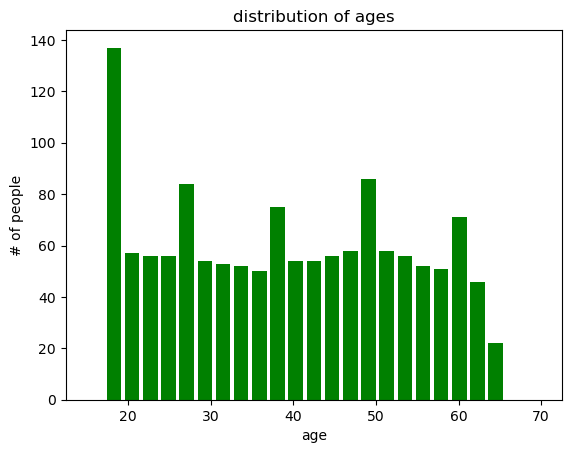

In [6]:
#histogram for ages in the data
range = (15, 70)
bins = 25

plt.hist(ages, bins, range, color = "green", histtype = "bar", rwidth = 0.8)

plt.xlabel("age")
plt.ylabel("# of people")
plt.title("distribution of ages")

plt.show()

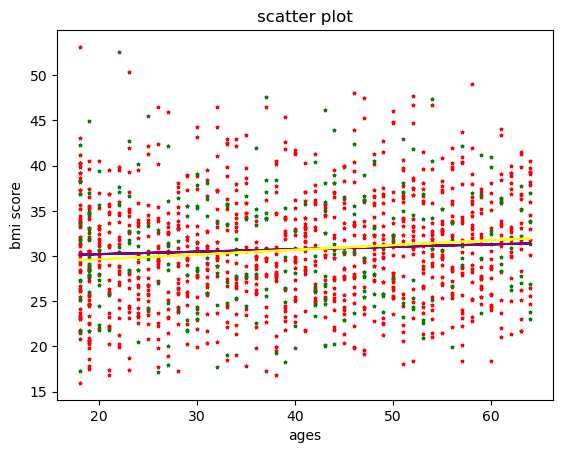

In [7]:
#scatter plot of smokers by age and bmis


smoker_ages = []

smoker_bmis = []
i = 0
while i < len(ages):
    if smokers[i] == "yes":
        smoker_ages.append(ages[i])
        smoker_bmis.append(bmis[i])
    i += 1

non_smoker_ages = []
non_smoker_bmis = []
i = 0
while i < len(ages):
    if smokers[i] == "no":
        non_smoker_ages.append(ages[i])
        non_smoker_bmis.append(bmis[i])
    i += 1

plt.scatter(non_smoker_ages, non_smoker_bmis, label = "stars", color = "red", marker = "*", s=5)

plt.scatter(smoker_ages, smoker_bmis, label = "stars", color = "green", marker = "*", s=5)
plt.xlabel("ages")
plt.ylabel("bmi score")
plt.title("scatter plot")

x = np.array(smoker_ages)
y = np.array(smoker_bmis)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color = "purple")

x = np.array(non_smoker_ages)
y = np.array(non_smoker_bmis)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color = "yellow")

plt.show()

{18: 31.3, 19: 28.6, 20: 30.6, 21: 28.2, 22: 31.1, 23: 31.5, 24: 29.1, 25: 29.7, 26: 29.4, 27: 29.3, 28: 29.5, 29: 29.4, 30: 30.6, 31: 29.9, 32: 31.6, 33: 31.2, 34: 30.3, 35: 31.4, 36: 29.4, 37: 31.2, 38: 29.0, 39: 29.9, 40: 30.1, 41: 31.5, 42: 30.3, 43: 30.2, 44: 30.8, 45: 29.8, 46: 31.3, 47: 30.7, 48: 31.9, 49: 30.3, 50: 31.1, 51: 31.7, 52: 32.9, 53: 30.4, 54: 31.2, 55: 32.0, 56: 31.6, 57: 30.8, 58: 32.7, 59: 30.6, 60: 30.3, 61: 32.5, 62: 32.3, 63: 31.9, 64: 33.0}
{18: 29.5, 19: 31.2, 20: 28.5, 21: 23.8, 22: 37.4, 23: 33.2, 24: 30.5, 25: 32.6, 26: 25.7, 27: 29.0, 28: 30.7, 29: 27.4, 30: 30.6, 31: 32.9, 32: 26.6, 33: 29.3, 34: 29.2, 35: 30.2, 36: 32.6, 37: 34.3, 38: 28.8, 39: 27.2, 40: 27.1, 41: 33.3, 42: 28.0, 43: 29.9, 44: 33.8, 45: 28.6, 46: 33.3, 47: 31.3, 48: 30.4, 49: 26.5, 50: 31.5, 51: 33.5, 52: 29.6, 53: 27.5, 54: 35.6, 55: 32.9, 56: 28.0, 57: 33.0, 58: 37.0, 59: 32.8, 60: 35.5, 61: 32.6, 62: 29.0, 63: 31.9, 64: 29.9}
{18: 31.7, 19: 27.7, 20: 31.6, 21: 28.5, 22: 29.4, 23: 30.

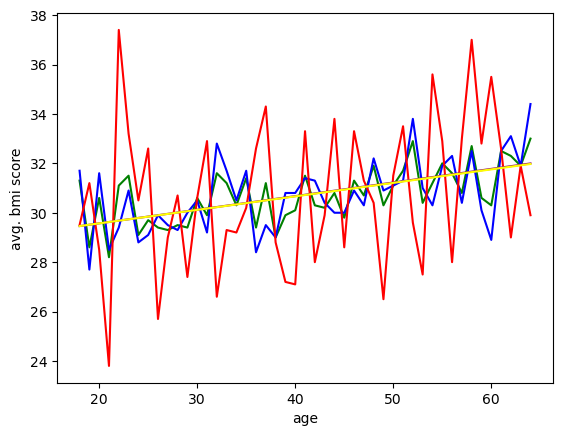

In [8]:
#line graph of average bmis by age group

#gathering each unique age represented in the data
ages_to_plot = []
#gathering how many people in each age group to help calculate the average later
age_occur = []
#gathering bmi total for each age group
bmis_to_plot = []
i = 0
while i < len(ages):
    if ages[i] not in ages_to_plot:
        ages_to_plot.append(ages[i])
        age_occur.append(1)
        bmis_to_plot.append(bmis[i])
    elif ages[i] in ages_to_plot:
        age_occur[ages_to_plot.index(ages[i])] += 1
        bmis_to_plot[ages_to_plot.index(ages[i])] += bmis[i]
    i+=1

#finding the average bmi for each age group
avg_bmis_to_plot = []
i = 0
while i < len(ages_to_plot):
    avg_bmis_to_plot.append(round(bmis_to_plot[i]/age_occur[i], 1))
    i += 1

#create dictionary for all these values with "age" as the key
age_bmi_dict = dict(zip(ages_to_plot, avg_bmis_to_plot))
sorted_keys = sorted(age_bmi_dict.keys())
age_bmi_dict_sorted = {key: age_bmi_dict[key] for key in sorted_keys}
print(age_bmi_dict_sorted)

#----------------------------------------------------------------------
#to create line graph data for average bmi for smokers in each age group
#gathering each unique age represented in the data
smoker_ages_to_plot = []
#gathering how many people in each age group to help calculate the average later
smoker_age_occur = []
#gathering bmi total for each age group
smoker_bmis_to_plot = []
i = 0
while i < len(ages):
    if ages[i] not in smoker_ages_to_plot and smokers[i] == "yes":
        smoker_ages_to_plot.append(ages[i])
        smoker_age_occur.append(1)
        smoker_bmis_to_plot.append(bmis[i])
    elif ages[i] in smoker_ages_to_plot and smokers[i] == "yes":
        smoker_age_occur[smoker_ages_to_plot.index(ages[i])] += 1
        smoker_bmis_to_plot[smoker_ages_to_plot.index(ages[i])] += bmis[i]
    i+=1

#finding the average bmi for each age group
avg_smoker_bmis_to_plot = []
i = 0
while i < len(smoker_ages_to_plot):
    avg_smoker_bmis_to_plot.append(round(smoker_bmis_to_plot[i]/smoker_age_occur[i], 1))
    i += 1

#create dictionary for all these values with "age" as the key
smoker_age_bmi_dict = dict(zip(smoker_ages_to_plot, avg_smoker_bmis_to_plot))
sorted_keys = sorted(smoker_age_bmi_dict.keys())
smoker_age_bmi_dict_sorted = {key: smoker_age_bmi_dict[key] for key in sorted_keys}
print(smoker_age_bmi_dict_sorted)


#----------------------------------------------------------------------
#to create line graph data for average bmi for nonsmokers in each age group
#gathering each unique age represented in the data
nonsmoker_ages_to_plot = []
#gathering how many people in each age group to help calculate the average later
nonsmoker_age_occur = []
#gathering bmi total for each age group
nonsmoker_bmis_to_plot = []
i = 0
while i < len(ages):
    if ages[i] not in nonsmoker_ages_to_plot and smokers[i] == "no":
        nonsmoker_ages_to_plot.append(ages[i])
        nonsmoker_age_occur.append(1)
        nonsmoker_bmis_to_plot.append(bmis[i])
    elif ages[i] in nonsmoker_ages_to_plot and smokers[i] == "no":
        nonsmoker_age_occur[nonsmoker_ages_to_plot.index(ages[i])] += 1
        nonsmoker_bmis_to_plot[nonsmoker_ages_to_plot.index(ages[i])] += bmis[i]
    i+=1

#finding the average bmi for each age group
avg_nonsmoker_bmis_to_plot = []
i = 0
while i < len(nonsmoker_ages_to_plot):
    avg_nonsmoker_bmis_to_plot.append(round(nonsmoker_bmis_to_plot[i]/nonsmoker_age_occur[i], 1))
    i += 1

#create dictionary for all these values with "age" as the key
nonsmoker_age_bmi_dict = dict(zip(nonsmoker_ages_to_plot, avg_nonsmoker_bmis_to_plot))
sorted_keys = sorted(nonsmoker_age_bmi_dict.keys())
nonsmoker_age_bmi_dict_sorted = {key: nonsmoker_age_bmi_dict[key] for key in sorted_keys}
print(nonsmoker_age_bmi_dict_sorted)

#----------------------------------------------------------------------
#creating the line graph

#line for average bmis of everyone at each age
x1 = list(age_bmi_dict_sorted.keys())
y1 = list(age_bmi_dict_sorted.values())
plt.plot(x1, y1, color = "green")

#line for average bmis of nonsmokers at each age
x1 = list(nonsmoker_age_bmi_dict_sorted.keys())
y1 = list(nonsmoker_age_bmi_dict_sorted.values())
plt.plot(x1, y1, color = "blue")

#line for average bmis of smokers at each age
x1 = list(smoker_age_bmi_dict_sorted.keys())
y1 = list(smoker_age_bmi_dict_sorted.values())
plt.plot(x1, y1, color = "red")

#non-smoker trendline
x = np.array(list(nonsmoker_age_bmi_dict_sorted.keys()))
y = np.array(list(nonsmoker_age_bmi_dict_sorted.values()))
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color = "purple")

#smoker trendline
x = np.array(list(smoker_age_bmi_dict_sorted.keys()))
y = np.array(list(smoker_age_bmi_dict_sorted.values()))
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color = "yellow")

plt.xlabel("age")
plt.ylabel("avg. bmi score")
plt.show()


In [9]:
#Converting original dataframe into a dictionary
df2 = df.to_dict("records")
print(df2)

[{'age': 19, 'sex': 'female', 'bmi': 27.9, 'children': 0, 'smoker': 'yes', 'region': 'southwest', 'charges': 16884.924}, {'age': 18, 'sex': 'male', 'bmi': 33.77, 'children': 1, 'smoker': 'no', 'region': 'southeast', 'charges': 1725.5523}, {'age': 28, 'sex': 'male', 'bmi': 33.0, 'children': 3, 'smoker': 'no', 'region': 'southeast', 'charges': 4449.462}, {'age': 33, 'sex': 'male', 'bmi': 22.705, 'children': 0, 'smoker': 'no', 'region': 'northwest', 'charges': 21984.47061}, {'age': 32, 'sex': 'male', 'bmi': 28.88, 'children': 0, 'smoker': 'no', 'region': 'northwest', 'charges': 3866.8552}, {'age': 31, 'sex': 'female', 'bmi': 25.74, 'children': 0, 'smoker': 'no', 'region': 'southeast', 'charges': 3756.6216}, {'age': 46, 'sex': 'female', 'bmi': 33.44, 'children': 1, 'smoker': 'no', 'region': 'southeast', 'charges': 8240.5896}, {'age': 37, 'sex': 'female', 'bmi': 27.74, 'children': 3, 'smoker': 'no', 'region': 'northwest', 'charges': 7281.5056}, {'age': 37, 'sex': 'male', 'bmi': 29.83, 'chil

In [15]:
#what is the bmi for a smoker/nonsmoker in each region?

def avg_bmi_region(smoker):
    
    smoker_total_bmi_se = 0
    num_smoker_se = 0
    smoker_total_bmi_sw = 0
    num_smoker_sw = 0
    smoker_total_bmi_nw = 0
    num_smoker_nw = 0
    smoker_total_bmi_ne = 0
    num_smoker_ne = 0
    
    nonsmoker_total_bmi_se = 0
    num_nonsmoker_se = 0
    nonsmoker_total_bmi_sw = 0
    num_nonsmoker_sw = 0
    nonsmoker_total_bmi_nw = 0
    num_nonsmoker_nw = 0
    nonsmoker_total_bmi_ne = 0
    num_nonsmoker_ne = 0

    for entry in df2:
        if entry["region"] == "southeast" and entry["smoker"] == "yes":
            num_smoker_se += 1
            smoker_total_bmi_se += entry["bmi"]
        elif entry["region"] == "southwest" and entry["smoker"] == "yes":
            num_smoker_sw += 1
            smoker_total_bmi_sw += entry["bmi"]
        elif entry["region"] == "northwest" and entry["smoker"] == "yes":
            num_smoker_nw += 1
            smoker_total_bmi_nw += entry["bmi"]
        elif entry["region"] == "northeast" and entry["smoker"] == "yes":
            num_smoker_ne += 1
            smoker_total_bmi_ne += entry["bmi"]
        elif entry["region"] == "southeast" and entry["smoker"] == "no":
            num_nonsmoker_se += 1
            nonsmoker_total_bmi_se += entry["bmi"]
        elif entry["region"] == "southwest" and entry["smoker"] == "no":
            num_nonsmoker_sw += 1
            nonsmoker_total_bmi_sw += entry["bmi"]
        elif entry["region"] == "northwest" and entry["smoker"] == "no":
            num_nonsmoker_nw += 1
            nonsmoker_total_bmi_nw += entry["bmi"]
        elif entry["region"] == "northeast" and entry["smoker"] == "no":
            num_nonsmoker_ne += 1
            nonsmoker_total_bmi_ne += entry["bmi"]
    
    bmi_result_dict = {}
    if smoker == "smoker":
        bmi_result_dict["smoker southeast"] = round(smoker_total_bmi_se/num_smoker_se, 2)
        bmi_result_dict["smoker southwest"] = round(smoker_total_bmi_sw/num_smoker_sw, 2)
        bmi_result_dict["smoker northwest"] = round(smoker_total_bmi_nw/num_smoker_nw, 2)
        bmi_result_dict["smoker northeast"] = round(smoker_total_bmi_ne/num_smoker_ne, 2)
        return bmi_result_dict
        print(bmi_result_dict)
    
    elif smoker == "nonsmoker":
        bmi_result_dict["nonsmoker southeast"] = round(nonsmoker_total_bmi_se/num_nonsmoker_se, 2)
        bmi_result_dict["nonsmoker southwest"] = round(nonsmoker_total_bmi_sw/num_nonsmoker_sw, 2)
        bmi_result_dict["nonsmoker northwest"] = round(nonsmoker_total_bmi_nw/num_nonsmoker_nw, 2)
        bmi_result_dict["nonsmoker northeast"] = round(nonsmoker_total_bmi_ne/num_nonsmoker_ne, 2)
        return bmi_result_dict
        print(bmi_result_dict)
        
    elif smoker == "both":
        bmi_result_dict["smoker southeast"] = round(smoker_total_bmi_se/num_smoker_se, 2)
        bmi_result_dict["nonsmoker southeast"] = round(nonsmoker_total_bmi_se/num_nonsmoker_se, 2)
        bmi_result_dict["smoker southwest"] = round(smoker_total_bmi_sw/num_smoker_sw, 2)
        bmi_result_dict["nonsmoker southwest"] = round(nonsmoker_total_bmi_sw/num_nonsmoker_sw, 2)
        bmi_result_dict["smoker northwest"] = round(smoker_total_bmi_nw/num_smoker_nw, 2)
        bmi_result_dict["nonsmoker northwest"] = round(nonsmoker_total_bmi_nw/num_nonsmoker_nw, 2)
        bmi_result_dict["smoker northeast"] = round(smoker_total_bmi_ne/num_smoker_ne, 2)
        bmi_result_dict["nonsmoker northeast"] = round(nonsmoker_total_bmi_ne/num_nonsmoker_ne, 2)
        return bmi_result_dict
        print(bmi_result_dict)

nonsmoker_total_avg = list(avg_bmi_region("nonsmoker").items())
smoker_total_avg = list(avg_bmi_region("smoker").items())

print(nonsmoker_total_avg)
print(smoker_total_avg)
      
# data to plot
# n_groups = 4
# group1 = nonsmoker_total_avg
# group2 = smoker_total_avg
# group1_names = list(avg_bmi_region("nonsmoker").keys())
# group2_names = list(avg_bmi_region("smoker").keys())


# # create plot
# fig, ax = plt.subplots()
# index = np.arange(n_groups)
# bar_width = 0.35
# opacity = 0.8

# rects1 = plt.bar(index, group1, bar_width,
# alpha=opacity,
# color='b',
# label='nonsmoker')

# rects2 = plt.bar(index + bar_width, group2, bar_width,
# alpha=opacity,
# color='g',
# label='smoker')

# plt.xlabel('regions')
# plt.ylabel("bmi score")
# plt.title('bmi by region')
# plt.xticks(index + bar_width, group1_names)
# plt.legend()

# plt.tight_layout()
# plt.show()

[('nonsmoker southeast', 33.44), ('nonsmoker southwest', 30.51), ('nonsmoker northwest', 29.21), ('nonsmoker northeast', 29.33)]
[('smoker southeast', 33.1), ('smoker southwest', 31.01), ('smoker northwest', 29.14), ('smoker northeast', 28.57)]
